In [1]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import utils as utils
import model as model
from model import (
    model_0,
    model_1,
    model_1_4,
    model_2,
    model_3,
    model_summary,
    model_train,
    model_test,
)

### Model_0

In [2]:
device = "cpu"
my_model = model_0().to(device)
model_summary(my_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
         MaxPool2d-3           [-1, 16, 13, 13]               0
            Conv2d-4           [-1, 16, 11, 11]           2,304
              ReLU-5           [-1, 16, 11, 11]               0
         MaxPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7             [-1, 16, 3, 3]           2,304
              ReLU-8             [-1, 16, 3, 3]               0
            Conv2d-9             [-1, 16, 1, 1]           2,304
             ReLU-10             [-1, 16, 1, 1]               0
           Linear-11                   [-1, 10]             170
             ReLU-12                   [-1, 10]               0
Total params: 7,226
Trainable params: 7,226
Non-trainable params: 0
-----------------------------------

In [3]:
# CUDA?
#cuda = torch.cuda.is_available()
#print("CUDA Available?", cuda)

##### Download the training and the test data

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=model.train_transforms())
test_data = datasets.MNIST('../data', train=False, download=True, transform=model.test_transforms())

##### Build the dataloaders

In [5]:
batch_size = 512

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

##### Look at some of the data

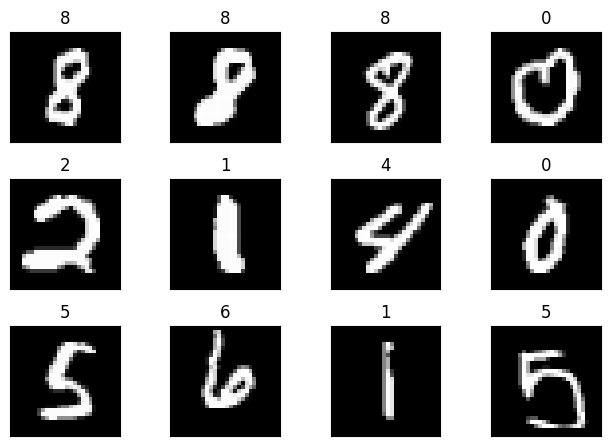

In [6]:
utils.return_dataset_images(train_loader, 12)

##### Initialize variables to use in making plots later on

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
optimizer = optim.SGD(my_model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(my_model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(my_model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 1


Train: Loss=0.6405 Batch_id=117 Accuracy=58.60: 100%|█| 118/118 [00:


Test set: Average loss: 0.5973, Accuracy: 7681/10000 (76.81%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 2


Train: Loss=0.2941 Batch_id=117 Accuracy=82.47: 100%|█| 118/118 [00:


Test set: Average loss: 0.3440, Accuracy: 8726/10000 (87.26%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 3


Train: Loss=0.2801 Batch_id=117 Accuracy=87.96: 100%|█| 118/118 [00:


Test set: Average loss: 0.2995, Accuracy: 8835/10000 (88.35%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 4


Train: Loss=0.1361 Batch_id=117 Accuracy=88.30: 100%|█| 118/118 [00:


Test set: Average loss: 0.2938, Accuracy: 8841/10000 (88.41%)

Adjusting learning rate of group 0 to 1.0000e-01.
Epoch 5


Train: Loss=0.2664 Batch_id=117 Accuracy=88.54: 100%|█| 118/118 [00:


Test set: Average loss: 0.2864, Accuracy: 8858/10000 (88.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1378 Batch_id=117 Accuracy=89.20: 100%|█| 118/118 [00:


Test set: Average loss: 0.2693, Accuracy: 8898/10000 (88.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.2053 Batch_id=117 Accuracy=89.28: 100%|█| 118/118 [00:


Test set: Average loss: 0.2686, Accuracy: 8905/10000 (89.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1322 Batch_id=117 Accuracy=89.27: 100%|█| 118/118 [00:


Test set: Average loss: 0.2676, Accuracy: 8900/10000 (89.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.3414 Batch_id=117 Accuracy=89.32: 100%|█| 118/118 [00:


Test set: Average loss: 0.2683, Accuracy: 8904/10000 (89.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.2207 Batch_id=117 Accuracy=89.33: 100%|█| 118/118 [00:


Test set: Average loss: 0.2687, Accuracy: 8899/10000 (88.99%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.1874 Batch_id=117 Accuracy=89.38: 100%|█| 118/118 [00:


Test set: Average loss: 0.2675, Accuracy: 8905/10000 (89.05%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.2891 Batch_id=79 Accuracy=89.54:  67%|▋| 79/118 [00:04

#### Base model: model_0
- Target:  get the basic structure, a model that predicts something.
-  Started with one conv block and then a fully connected layer,
-  realized adding conv reduces number of parameters
-  while increasing what the model learns. Kept adding conv blocks until close to 8000 parameters
- Only this in augmentation: transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)),

#### Results:
- Parameters: 7,226, best train accuracy: 88.63. best test accuracy: 88.81

#### Analysis:
- Model is small, works.
- Test accuracy is higher than train, most likely it is the case of summation over all batches idea.


Reduce one convolution block

In [ ]:
device = "cpu"
model = model_2().to(device)
model_summary(model,(1,28,28))

##### Train a model

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

##### Visualize the training performance 

In [ ]:
utils.plot_losses_accuracies(train_acc, train_losses, test_acc, test_losses,)

### Step 2
- Reduce model parameter even more

In [ ]:
device = "cpu"
model = model_3().to(device)
model_summary(model,(1,28,28))

### Train a model

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
#criterion = nn.CrossEntropyLoss()
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_acc, train_losses = model_train(model, 
                                        device, 
                                        train_loader,
                                        optimizer, 
                                        criterion, 
                                        train_acc,
                                        train_losses,)
    test_acc, test_losses = model_test(model, 
                                     device, 
                                     test_loader, 
                                     criterion,
                                     test_acc,
                                     test_losses)
    scheduler.step()

In [ ]:
98.58
99.30
moved max pool
added a fully connected layer: 99.15
increased outsize 
99.34

In [ ]:
utils.plot_losses_accuracies(train_acc, train_losses, test_acc, test_losses,)